# Using the `antarctic_plots.regions` module

## Display all the pre-defined regions

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from antarctic_plots import maps, regions, fetch, maps, utils
from statistics import mean

Add all region strings to dictionary

In [2]:
region_dict = regions.get_regions()
region_dict

{'antarctica': (-2800000.0, 2800000.0, -2800000.0, 2800000.0),
 'west_antarctica': (-2740000.0, 570000.0, -2150000.0, 1670000.0),
 'east_antarctica': (-840000.0, 2880000.0, -2400000.0, 2600000.0),
 'antarctic_peninsula': (-2600000.0, -1200000.0, 170000.0, 1800000.0),
 'marie_byrd_land': (-1500000.0, -500000.0, -1350000.0, -800000.0),
 'victoria_land': (100000.0, 1000000.0, -2200000.0, -1000000.0),
 'roosevelt_island': (-480000.0, -240000.0, -1220000.0, -980000.0),
 'ross_island': (210000.0, 360000.0, -1400000.0, -1250000.0),
 'minna_bluff': (210000.0, 390000.0, -1310000.0, -1120000.0),
 'mcmurdo_dry_valleys': (320000.0, 480000.0, -1400000.0, -1220000.0),
 'siple_coast': (-700000.0, 30000.0, -1110000.0, -450000.0),
 'crary_ice_rise': (-330000.0, -40000.0, -830000.0, -480000.0),
 'siple_dome': (-630000.0, -270000.0, -970000.0, -630000.0),
 'ross_ice_shelf': (-680000.0, 470000.0, -1420000.0, -310000.0),
 'larsen_ice_shelf': (-2430000.0, -1920000.0, 900000.0, 1400000.0),
 'ronne_filchner_i

Remove a few regions to help with plotting

In [3]:
%%capture
remove = ["antarctica", "west_antarctica", "east_antarctica"]
[region_dict.pop(key) for key in remove]

Plot the remaining regions

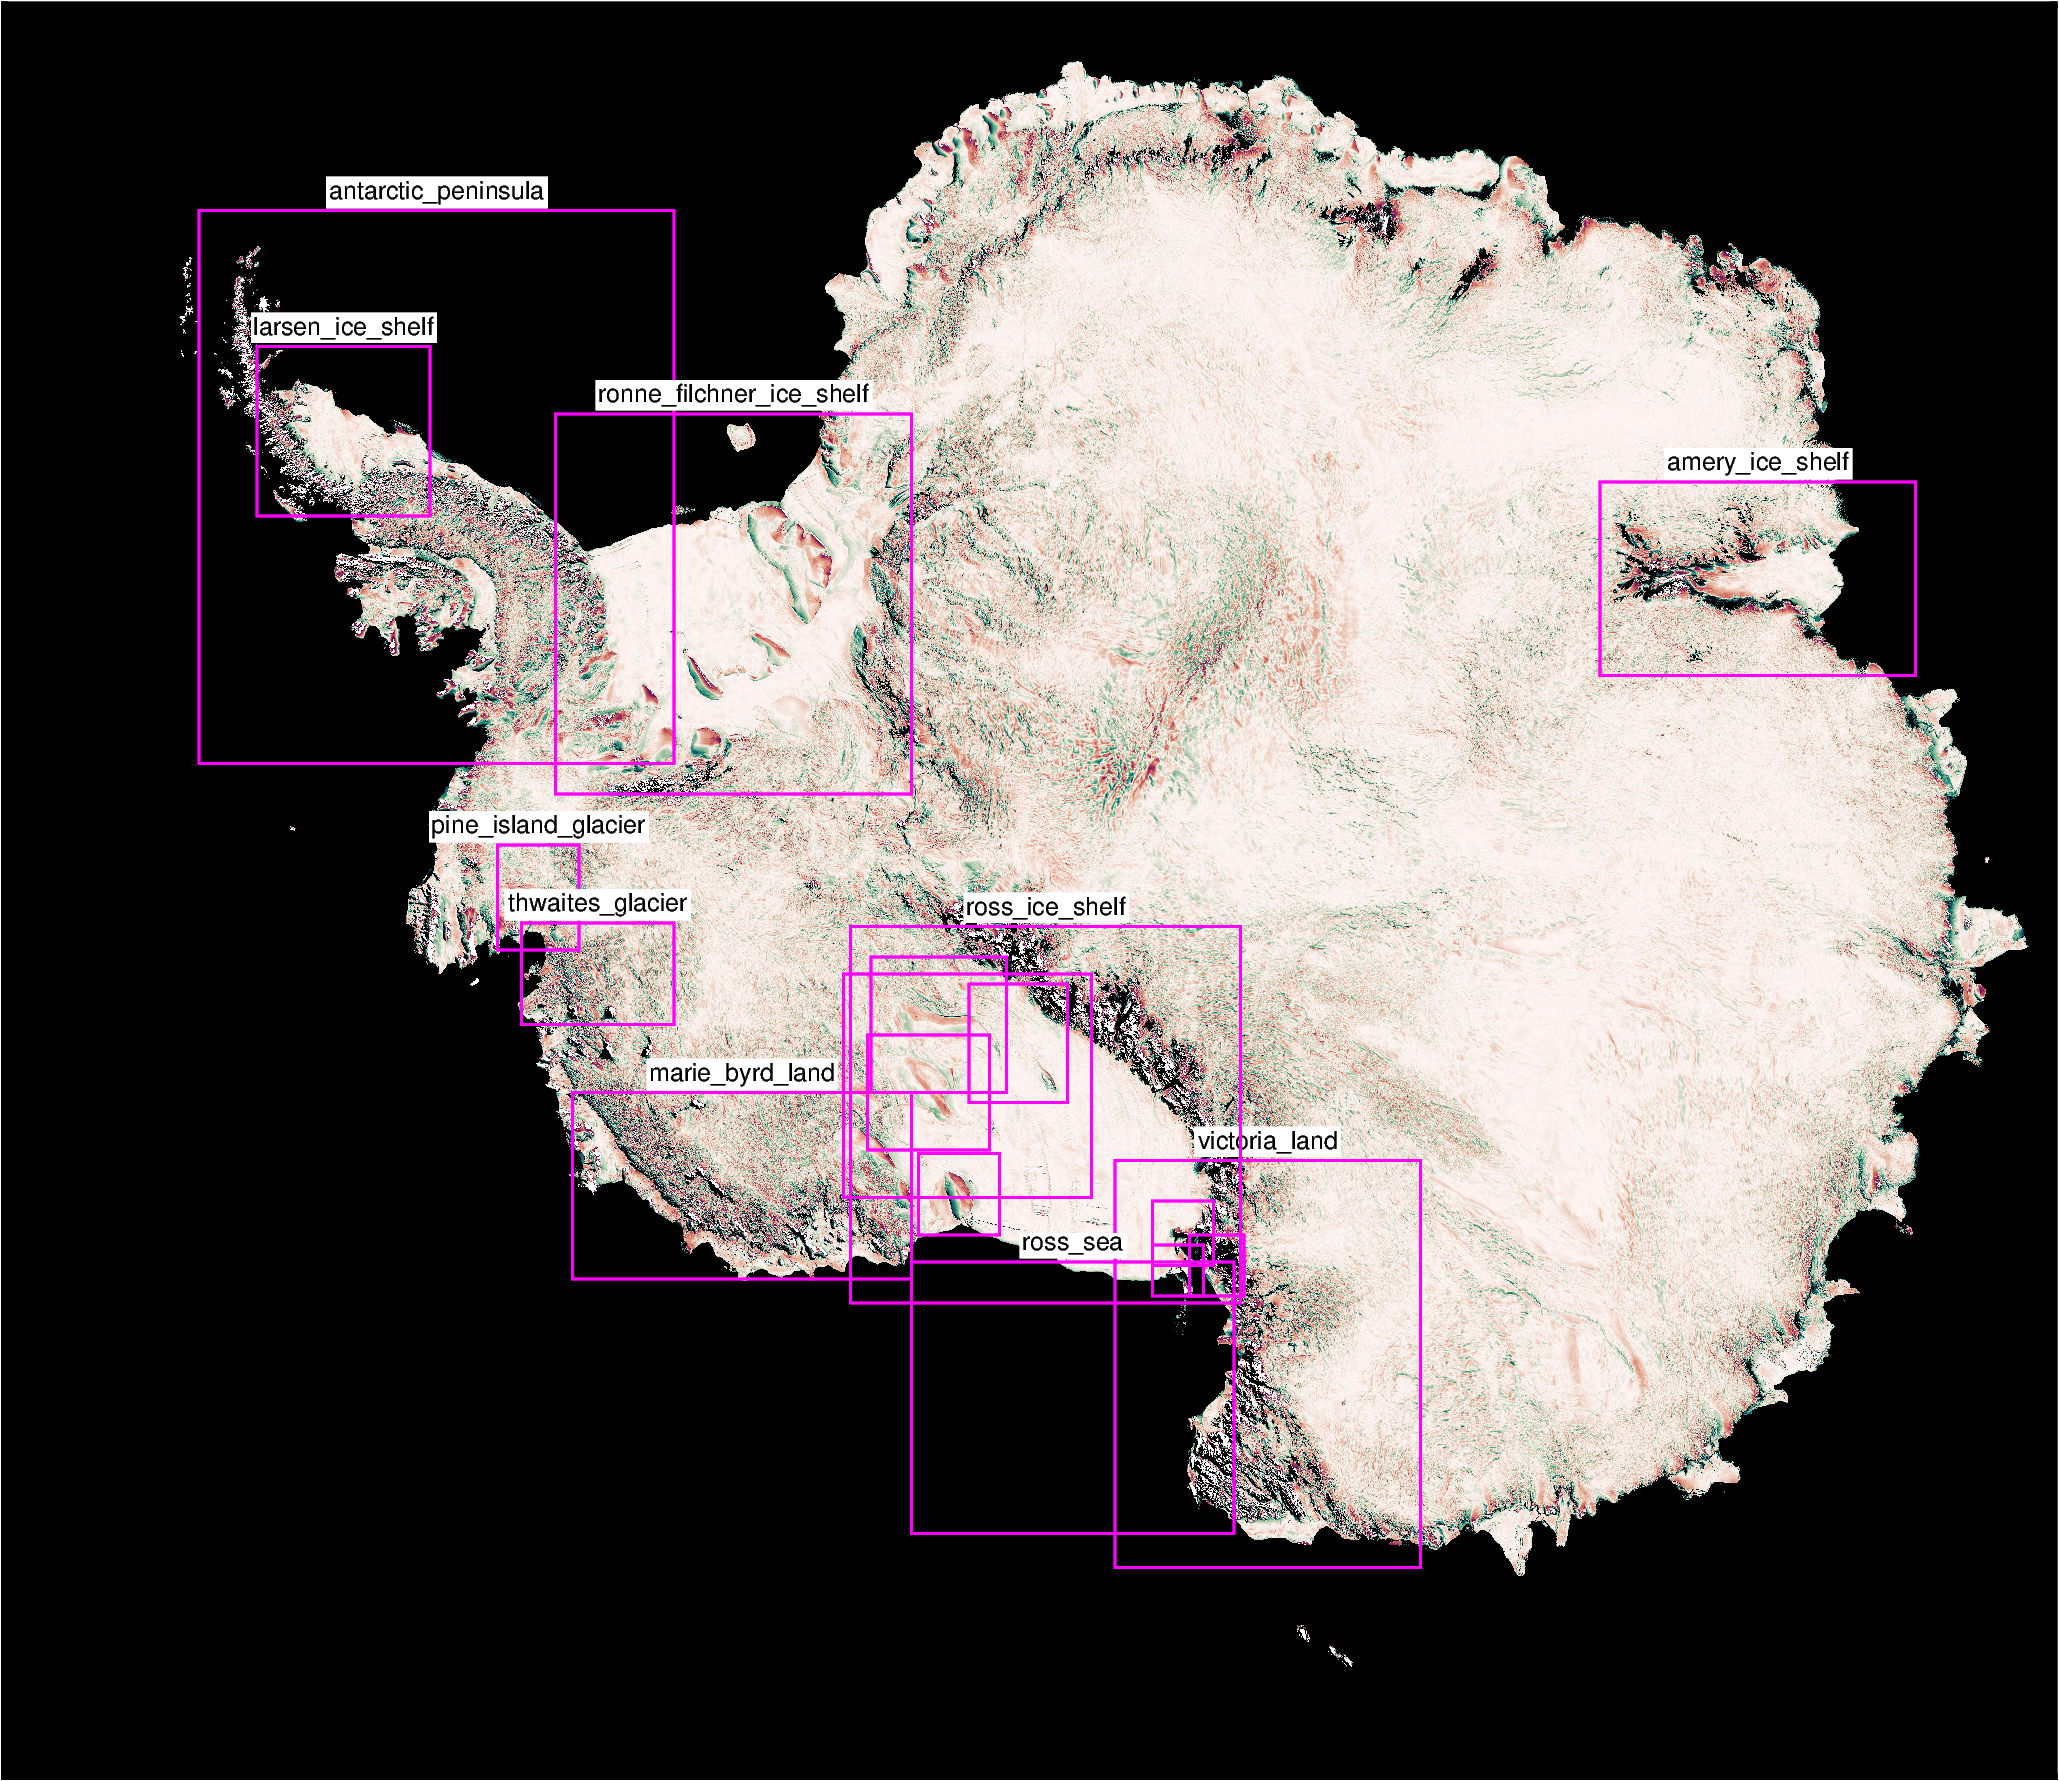

In [11]:
fig = maps.plot_grd(
    # grid=fetch.imagery(),
    grid=fetch.modis_moa(),
    image=True,
    cmap="curl",
)

for k, v in region_dict.items():
    maps.add_box(fig, v, pen=".6p,magenta")
    if k not in [
        "minna_bluff",
        "mcmurdo_dry_valleys",
        "siple_dome",
        "siple_coast",
        "roosevelt_island",
        "ross_island",
        "crary_ice_rise",
        "kamb_ice_stream",
    ]:
        fig.text(
            x=mean([v[1], v[0]]),
            y=v[3],
            text=k,
            justify="CB",
            offset="0/.1",
            no_clip=True,
            font="6p,Helvetica,black",
            fill="white",
        )

fig.show()

## Combining regions

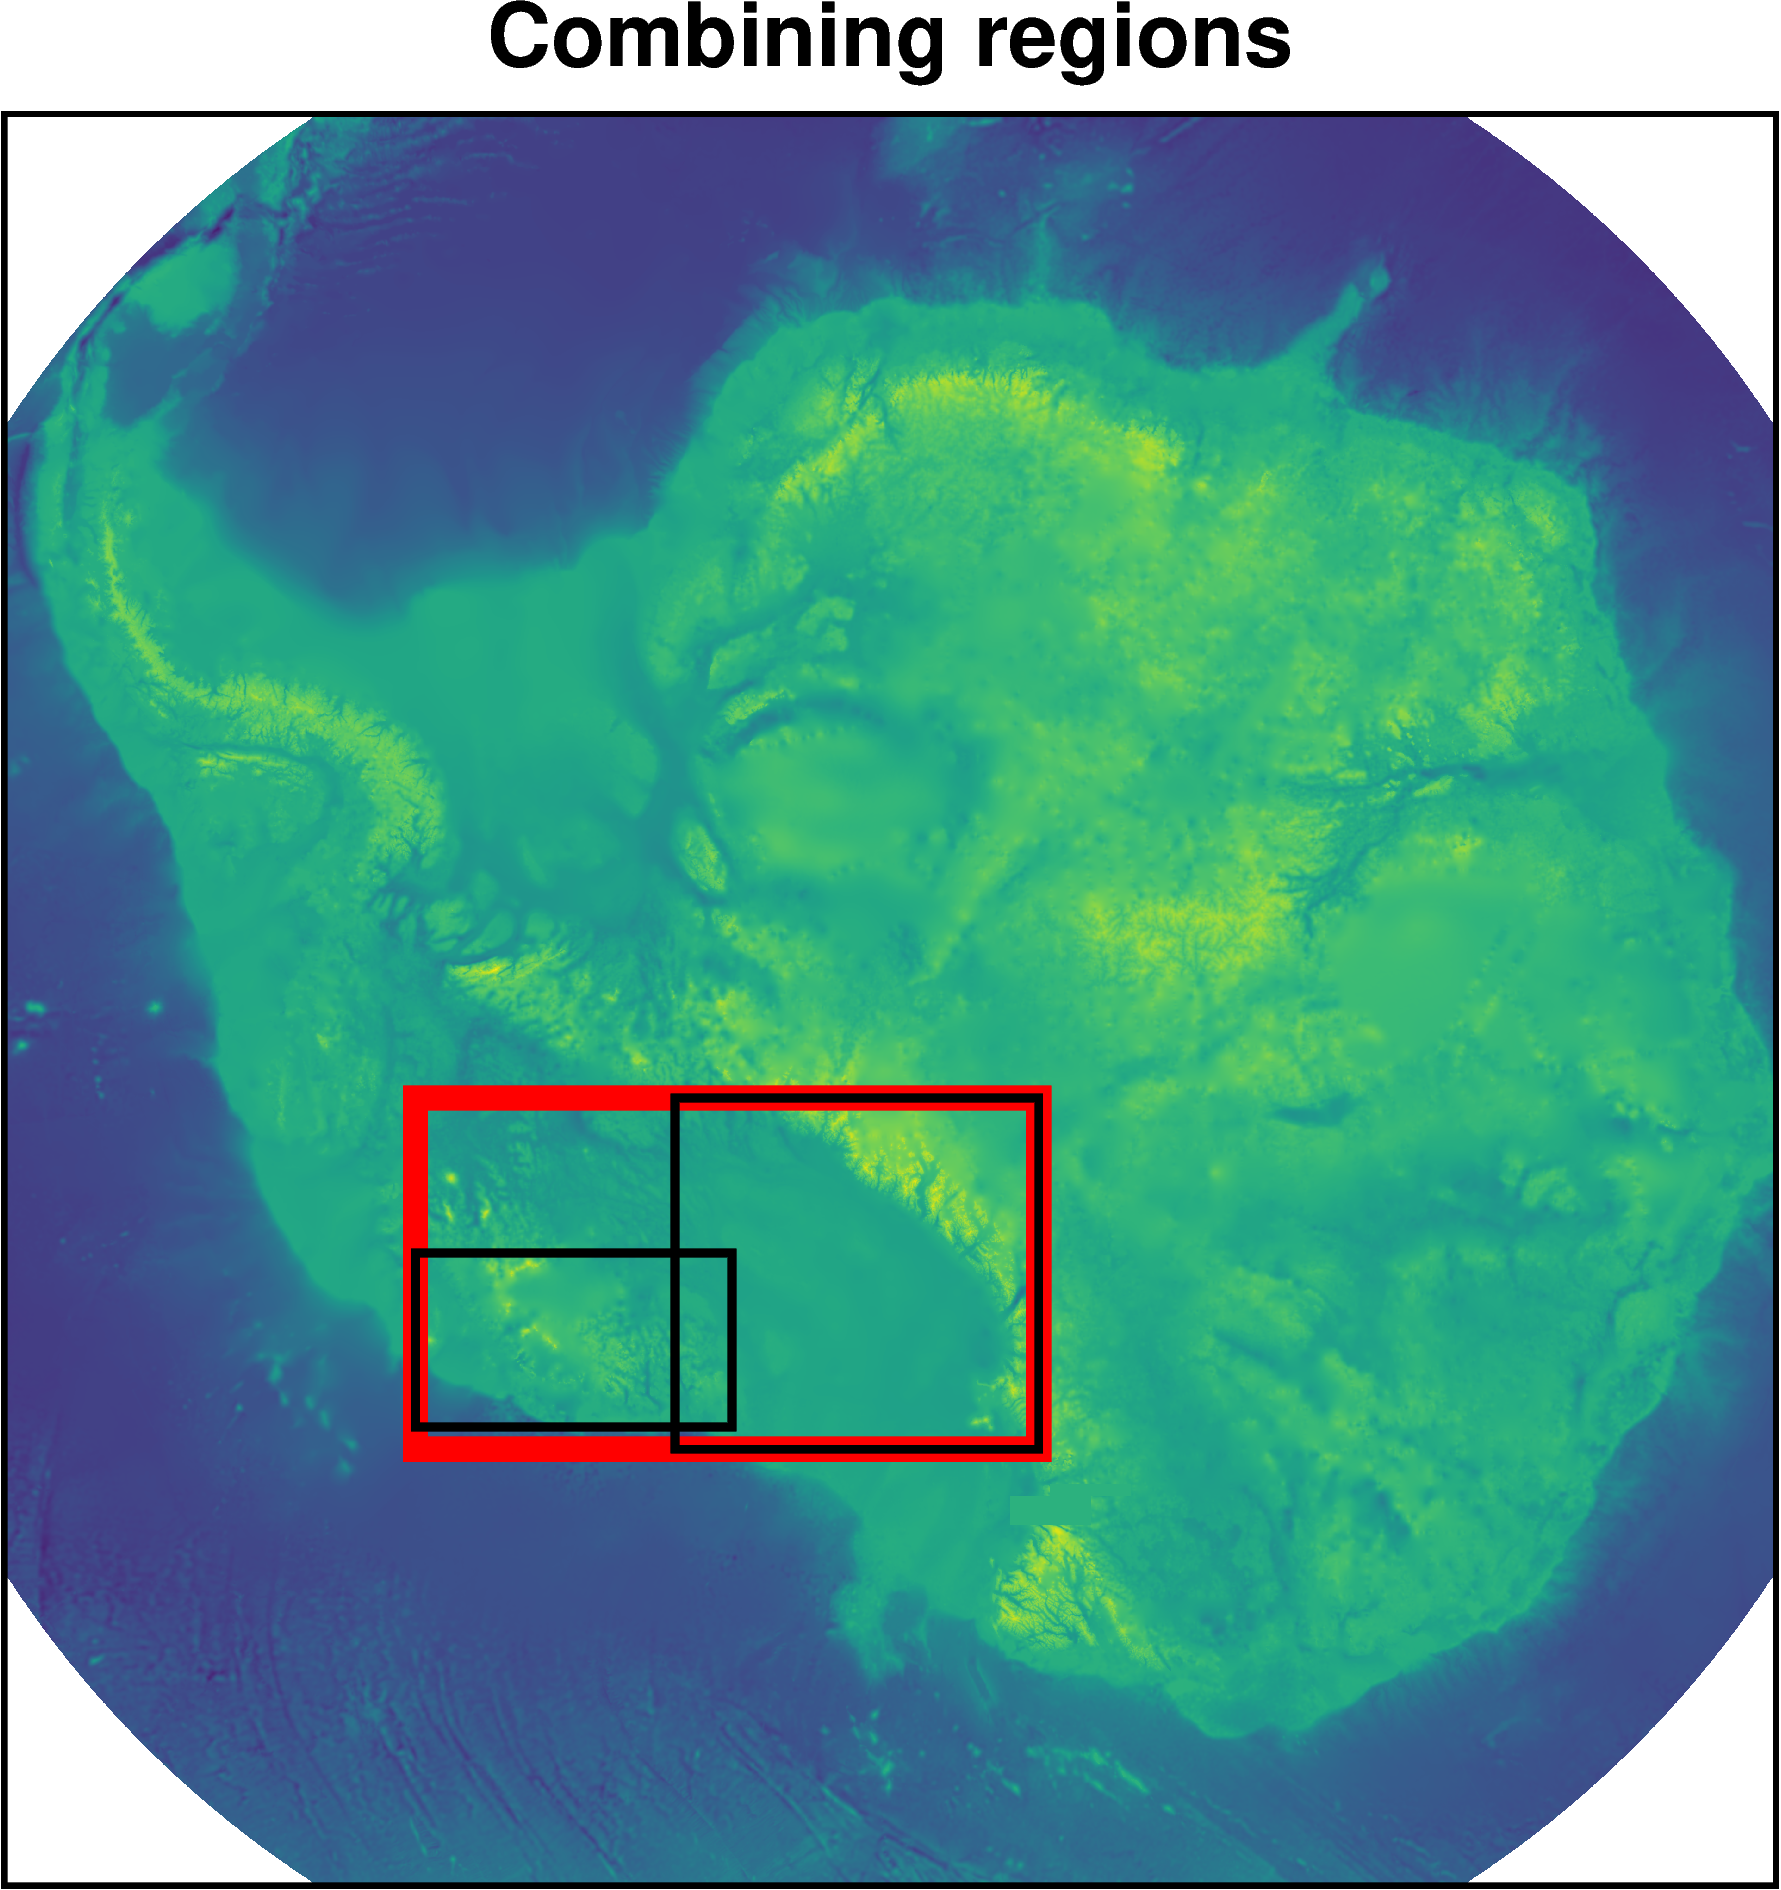

In [14]:
# define two regions
RIS = regions.ross_ice_shelf
MBL = regions.marie_byrd_land

# get the bounding region of both
combined = regions.combine_regions(RIS, MBL)

# make a basemap
fig = maps.plot_grd(
    fetch.bedmap2(layer="bed"),
    region=regions.antarctica,
    colorbar=False,
    title="Combining regions",
)
# plot the three regions
maps.add_box(fig, combined, pen="6p,red")
maps.add_box(fig, RIS)
maps.add_box(fig, MBL)

fig.show()

## Interactively choose a region
This use the package `ipyleaflet`, which isn't install automatically with `antarctic-plots`. Install it with `mamba install ipyleaflet`

The below cell will display an interactive map of Antarctica. Drag or zoom to your region of interest and use the `Draw a polygon` button to create a polygon outline the region you want.

In [47]:
polygon = regions.draw_region()

Label(value='')

Map(center=[-90.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [48]:
# get the bounding region of the polygon
region = utils.polygon_to_region(polygon)
region

(-231126.51921880982,
 88540.46702791154,
 1796446.6390824455,
 2263397.8642284973)

mapproject [WARNING]: For a UTM or TM projection, your region -231126.51921880982/88540.46702791154/1796446.6390824455/2263397.8642284973 is too large to be in degrees and thus assumed to be in meters
colorbar [WARNING]: For a UTM or TM projection, your region -231126.51921880982/88540.46702791154/1796446.6390824455/2263397.8642284973 is too large to be in degrees and thus assumed to be in meters


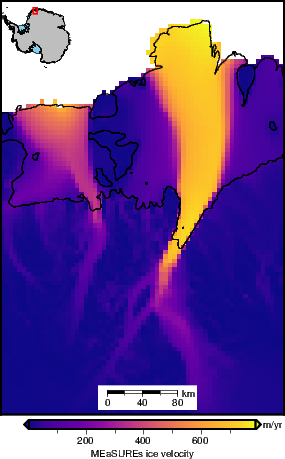

In [52]:
# use it to create a map
maps.plot_grd(
    fetch.ice_vel(region=region, verbose="q"),
    region=region,
    cmap="plasma",
    grd2cpt=True,
    inset=True,
    cbar_label="MEaSUREs ice velocity",
    cbar_unit="m/yr",
    coast=True,
    scalebar=True,
    scalebar_box="+gwhite",
)